# HOUSE RENT PREDICTION OF DIFFERENT CITIES OF INDIA

### In this notebook, we will be creating a model that will predict the rent of a house/apartment/flat based on various input features present in the dataset. We will also do some exploratory data analysis, data preprocessing, and feature engineering if required.

In [ ]:
# Importing necessary library
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the dataset
data = pd.read_csv('/content/House_Rent_Dataset.csv')
data.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [ ]:
data.shape

(4746, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [ ]:
# drop the posted column
data.drop('Posted On',axis=1,inplace=True)

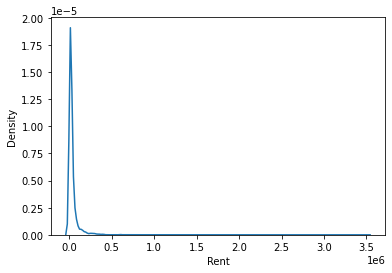

In [ ]:
#Kernel density estimate use for continous probabilty density curve in one or more dimensions.
sns.kdeplot(x='Rent', data=data)

### Checking null values in dataset

In [ ]:
data.isnull().sum()

BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [ ]:
# There is no null value present in the dataset

## Exploratory Data Analysis

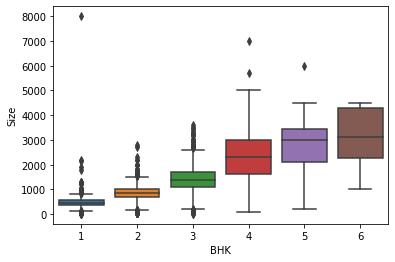

In [ ]:
sns.boxplot(x='BHK',y='Size',data=data)
plt.show()

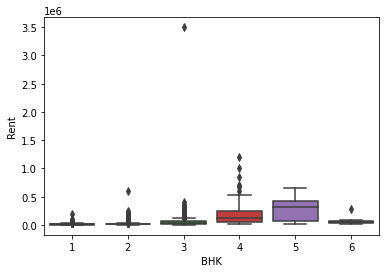

In [ ]:
sns.boxplot(x='BHK',y='Rent',data=data)
plt.show()

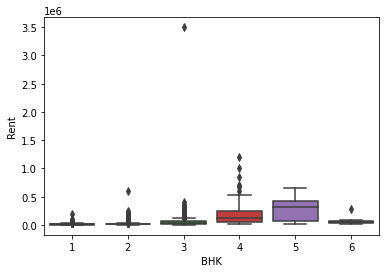

In [ ]:
sns.boxplot(x='BHK',y='Rent',data=data)
plt.show()

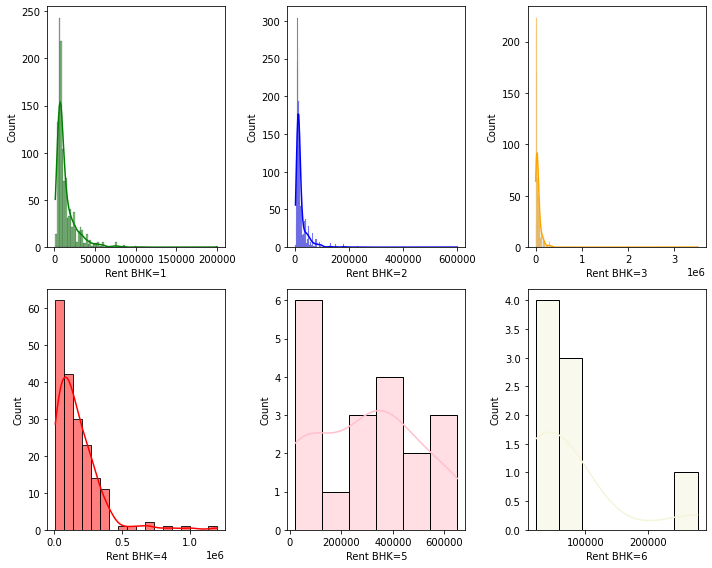

In [ ]:
cfig, axs = plt.subplots(nrows=2,ncols=3,figsize=(10,8))
sns.histplot(data=data[data['BHK']==1],x='Rent',ax=axs[0,0],kde=True,color='green')
axs[0,0].set(xlabel='Rent BHK=1')

sns.histplot(data=data[data['BHK']==2],x='Rent',ax=axs[0,1],kde=True,color='blue')
axs[0,1].set(xlabel='Rent BHK=2')

sns.histplot(data=data[data['BHK']==3],x='Rent',ax=axs[0,2],kde=True,color='orange')
axs[0,2].set(xlabel='Rent BHK=3')

sns.histplot(data=data[data['BHK']==4],x='Rent',ax=axs[1,0],kde=True,color='red')
axs[1,0].set(xlabel='Rent BHK=4')

sns.histplot(data=data[data['BHK']==5],x='Rent',ax=axs[1,1],kde=True,color='pink')
axs[1,1].set(xlabel='Rent BHK=5')

sns.histplot(data=data[data['BHK']==6],x='Rent',ax=axs[1,2],kde=True,color='beige')
axs[1,2].set(xlabel='Rent BHK=6')

plt.tight_layout()
plt.show()

In [ ]:
data['City'].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [ ]:
s = data.groupby('City').mean()['Rent'].sort_values(ascending=False)
s

City
Mumbai       85321.204733
Delhi        29461.983471
Bangalore    24966.365688
Chennai      21614.092031
Hyderabad    20555.048387
Kolkata      11645.173664
Name: Rent, dtype: float64

In [ ]:
# The houses of Mumbai seems to be more expansive and t.he houses of Kolkata seems to be least expansive.

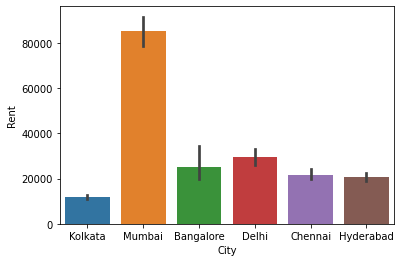

In [ ]:
sns.barplot(x='City',y='Rent',data = data)

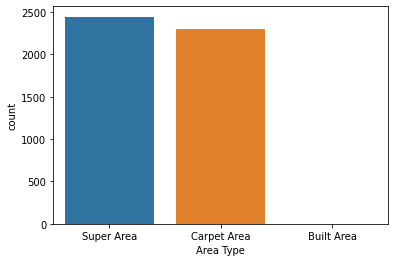

In [ ]:
fig, ax=plt.subplots()
sns.countplot(x='Area Type',data=data,ax=ax)

plt.show()

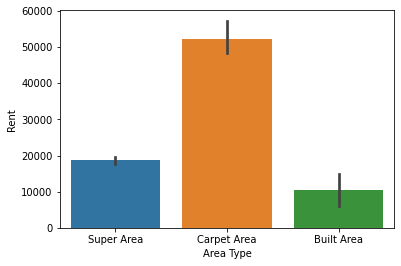

In [ ]:
sns.barplot(x='Area Type',y='Rent',data=data)
plt.show()

In [ ]:
# Variation of rent of different cities of India according to number of BHK

In [ ]:
m = data.groupby(['City','BHK']).agg(['min','max','mean'])['Rent']
m

min      max           mean
City      BHK                                
Bangalore 1      3500    70000    9368.333333
          2      5000    90000   16122.041763
          3     12000  3500000   61988.580247
          4     14000   380000  113043.478261
Chennai   1      3000    21000    8455.926380
          2      5000   600000   15701.692149
          3      7000   330000   35741.913636
          4     20000   250000   96350.000000
          5     50000   100000   75000.000000
          6     60000   280000  170000.000000
Delhi     1      3500    35000   11332.500000
          2      2000   150000   18878.342520
          3      8000   350000   44141.558442
          4     15000   530000  117455.583333
          5    190000   190000  190000.000000
Hyderabad 1      3000   200000    9753.793103
          2      5000   130000   13877.652466
          3      1200   130000   29337.650206
          4     10000   400000   95730.769231
          5     45000   300000  131666.666667
          6     20000    80000   45000.000000
Kolkata   1      1500    50000    6897.183099
          2      2200   180000   10687.847826
          3      3200    65000   19666.576087
          4     10000    40000   26909.090909
          5     22500    25000   23750.000000
          6     20000    20000   20000.000000
Mumbai    1      4500   100000   29218.843206
          2      6500   250000   57768.195187
          3     15000   400000  122009.242291
          4     45000  1200000  279109.589041
          5    300000   650000  442727.272727

In [ ]:
# Extracting data for Bangalore city
l = data[data['City']=='Bangalore']
l

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1496,3,70000,3354,Ground out of 16,Carpet Area,Talagatta Pura,Bangalore,Furnished,Bachelors/Family,3,Contact Agent
1497,2,10500,800,3 out of 4,Super Area,Nagappa Reddy layout-Dooravani Nagar,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
1498,2,13000,1000,Ground out of 4,Super Area,"Kattigenahalli, Bellary Road",Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
1499,2,17000,1040,4 out of 4,Super Area,C V Raman Nagar,Bangalore,Furnished,Bachelors/Family,2,Contact Owner
1500,3,21000,1403,1 out of 4,Super Area,"Chikkalasandra, Bangalore",Bangalore,Semi-Furnished,Bachelors/Family,3,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...
2377,1,8000,500,2 out of 2,Super Area,Frazer Town,Bangalore,Furnished,Bachelors/Family,1,Contact Owner
2378,2,11000,1200,Ground out of 2,Super Area,"Kadugondanahalli, Kadugondanahalli",Bangalore,Unfurnished,Bachelors/Family,2,Contact Owner
2379,1,8000,750,1 out of 3,Super Area,"Prakruthi Township, Hennur",Bangalore,Unfurnished,Bachelors/Family,1,Contact Owner
2380,1,13000,700,1 out of 5,Super Area,GH Society,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [ ]:
l.groupby('BHK').mean()['Rent'].sort_values(ascending=False)


BHK
4    113043.478261
3     61988.580247
2     16122.041763
1      9368.333333
Name: Rent, dtype: float64

In [ ]:
# As expected Rent of house increases with the number of BHK.

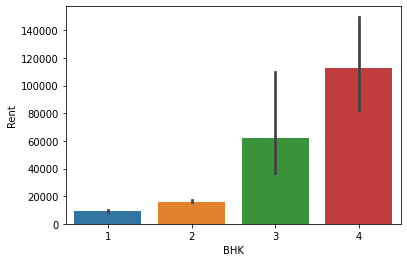

In [ ]:
sns.barplot(x='BHK',y='Rent',data = data[data['City']=='Bangalore'])

In [ ]:
# Analysing variation of rent for Chennai city

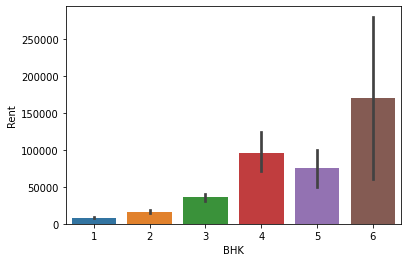

In [ ]:
sns.barplot(x='BHK',y='Rent',data = data[data['City']=='Chennai'])

In [ ]:
# Analysing variation of rent for Delhi city

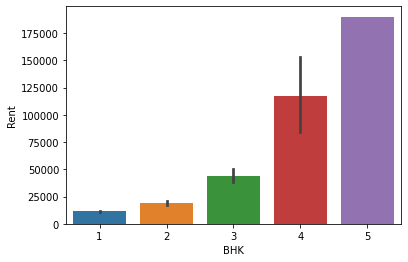

In [ ]:
sns.barplot(x='BHK',y='Rent',data = data[data['City']=='Delhi'])

In [ ]:
# Analysing variation of rent for Hyderabad city

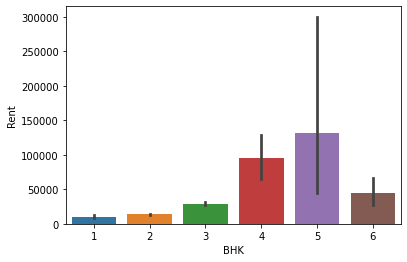

In [ ]:
sns.barplot(x='BHK',y='Rent',data = data[data['City']=='Hyderabad'])

In [ ]:
# Analysing variation of rent for Kolkata city

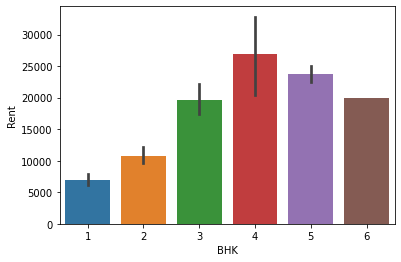

In [ ]:
sns.barplot(x='BHK',y='Rent',data = data[data['City']=='Kolkata'])

In [ ]:
# Analysing variation of rent for Mumbai city

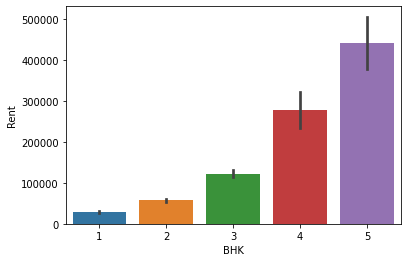

In [ ]:
sns.barplot(x='BHK',y='Rent',data = data[data['City']=='Mumbai'])

In [ ]:
# Analysing variation of Area Type for Mumbai city

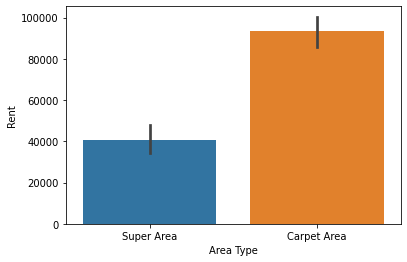

In [ ]:
sns.barplot(x='Area Type',y='Rent',data = data[data['City']=='Mumbai'])

In [ ]:
# Analysing variation of Area Type for Kolkata city

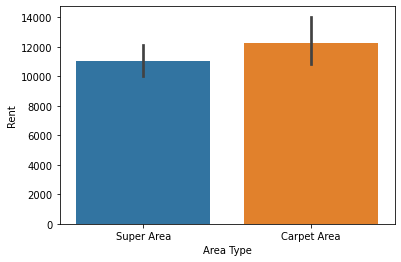

In [ ]:
sns.barplot(x='Area Type',y='Rent',data = data[data['City']=='Kolkata'])

In [ ]:
# Analysing variation of Area Type for Hyderabad city

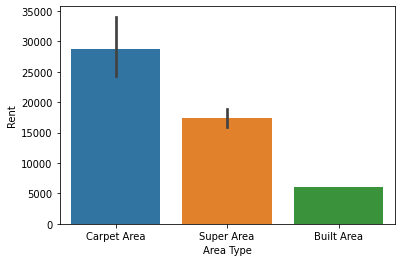

In [ ]:
sns.barplot(x='Area Type',y='Rent',data = data[data['City']=='Hyderabad'])

In [ ]:
# Analysing variation of Area Type for Delhi city

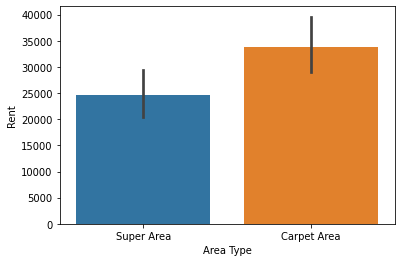

In [ ]:
sns.barplot(x='Area Type',y='Rent',data = data[data['City']=='Delhi'])

In [ ]:
# Analysing variation of Area Type for Chennai city

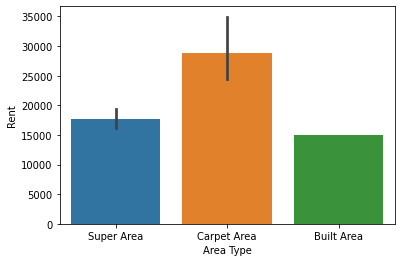

In [ ]:
sns.barplot(x='Area Type',y='Rent',data = data[data['City']=='Chennai'])

In [ ]:
# Analysing variation of Area Type for Bangalore city

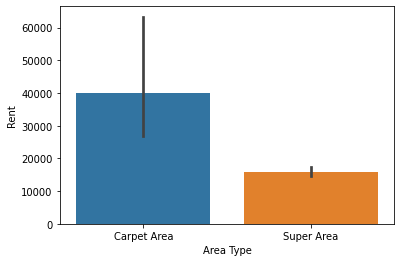

In [ ]:
sns.barplot(x='Area Type',y='Rent',data = data[data['City']=='Bangalore'])

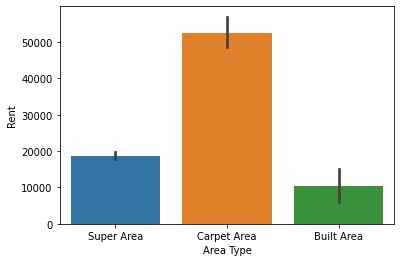

In [ ]:
sns.barplot(x='Area Type',y='Rent',data = data)

In [ ]:
# The houses with Carpet Area Type is more favoured.

In [ ]:
# Analysing variation of Tenant Preferred for Mumbai city

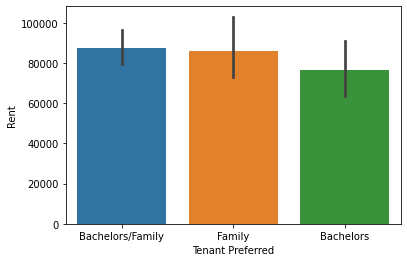

In [ ]:
sns.barplot(x='Tenant Preferred',y='Rent',data = data[data['City']=='Mumbai'])

In [ ]:
# Analysing variation of Tenant Preferred for Delhi city

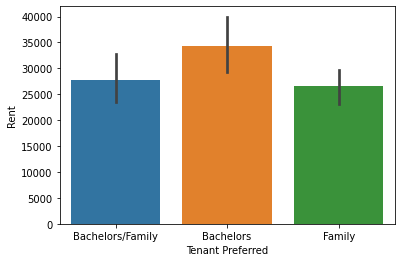

In [ ]:
sns.barplot(x='Tenant Preferred',y='Rent',data = data[data['City']=='Delhi'])

In [ ]:
# Analysing variation of Tenant Preferred for Hyderabad city

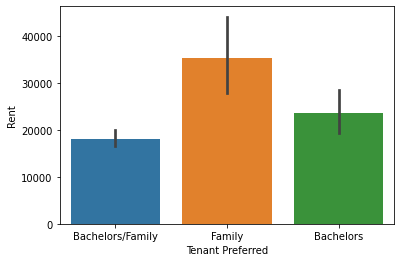

In [ ]:
sns.barplot(x='Tenant Preferred',y='Rent',data = data[data['City']=='Hyderabad'])

In [ ]:
# Analysing variation of Tenant Preferred for Chennai city

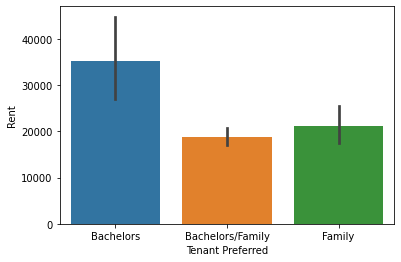

In [ ]:
sns.barplot(x='Tenant Preferred',y='Rent',data = data[data['City']=='Chennai'])

In [ ]:
# Analysing variation of Tenant Preferred for Kolkata city

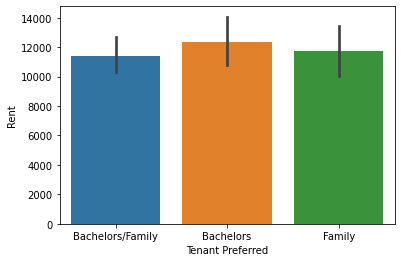

In [ ]:
sns.barplot(x='Tenant Preferred',y='Rent',data = data[data['City']=='Kolkata'])

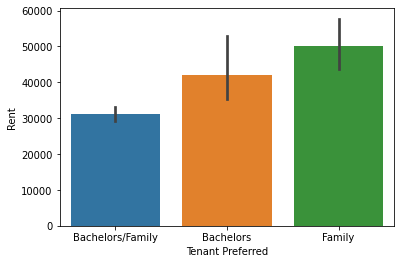

In [ ]:
sns.barplot(x='Tenant Preferred',y='Rent',data = data)

In [ ]:
# This shows that Family has to pay more money as rent than Bachelors.

In [ ]:
data.groupby(['City','Area Locality','Floor','BHK']).agg(['min','max','mean'])['Rent']

min  \
City      Area Locality                                 Floor           BHK          
Bangalore A Narayanapura, Mahadevapura                  5 out of 5      1    15000   
                                                        Ground out of 3 2    14000   
          Aarna Enclave                                 4 out of 5      2    90000   
          Abbiareddy Layout, Kaggadasapura              1 out of 4      2    22500   
          Abbigere                                      1 out of 2      1     6000   
...                                                                            ...   
Mumbai    simla house at nepeasea road, Napean Sea Road 3 out of 6      1    45000   
          spring grove uno, Lokhandwala Twp             5 out of 7      1    18000   
          sra                                           19 out of 19    1    15000   
          sunanda circal                                3 out of 7      1     7500   
          vanamali chs ghatla, Ghatla                   4 out of 20     2    52000   

                                                                               max  \
City      Area Locality                                 Floor           BHK          
Bangalore A Narayanapura, Mahadevapura                  5 out of 5      1    15000   
                                                        Ground out of 3 2    14000   
          Aarna Enclave                                 4 out of 5      2    90000   
          Abbiareddy Layout, Kaggadasapura              1 out of 4      2    22500   
          Abbigere                                      1 out of 2      1     6000   
...                                                                            ...   
Mumbai    simla house at nepeasea road, Napean Sea Road 3 out of 6      1    45000   
          spring grove uno, Lokhandwala Twp             5 out of 7      1    18000   
          sra                                           19 out of 19    1    15000   
          sunanda circal                                3 out of 7      1     7500   
          vanamali chs ghatla, Ghatla                   4 out of 20     2    52000   

                                                                                mean  
City      Area Locality                                 Floor           BHK           
Bangalore A Narayanapura, Mahadevapura                  5 out of 5      1    15000.0  
                                                        Ground out of 3 2    14000.0  
          Aarna Enclave                                 4 out of 5      2    90000.0  
          Abbiareddy Layout, Kaggadasapura              1 out of 4      2    22500.0  
          Abbigere                                      1 out of 2      1     6000.0  
...                                                                              ...  
Mumbai    simla house at nepeasea road, Napean Sea Road 3 out of 6      1    45000.0  
          spring grove uno, Lokhandwala Twp             5 out of 7      1    18000.0  
          sra                                           19 out of 19    1    15000.0  
          sunanda circal                                3 out of 7      1     7500.0  
          vanamali chs ghatla, Ghatla                   4 out of 20     2    52000.0  

[4408 rows x 3 columns]

In [ ]:
data.groupby(['City','Area Locality']).agg(['min','max','mean'])['Rent']

min    max  \
City      Area Locality                                                 
Bangalore A Narayanapura, Mahadevapura                   14000  15000   
          Aarna Enclave                                  90000  90000   
          Abbiareddy Layout, Kaggadasapura               22500  22500   
          Abbigere                                        6000  12000   
          Aditya Nagar-Vidyaranyapura, Vidyaranyapura    10000  10000   
...                                                        ...    ...   
Mumbai    simla house at nepeasea road, Napean Sea Road  45000  45000   
          spring grove uno, Lokhandwala Twp              18000  18000   
          sra                                            15000  15000   
          sunanda circal                                  7500   7500   
          vanamali chs ghatla, Ghatla                    52000  52000   

                                                                 mean  
City      Area Locality                                                
Bangalore A Narayanapura, Mahadevapura                   14500.000000  
          Aarna Enclave                                  90000.000000  
          Abbiareddy Layout, Kaggadasapura               22500.000000  
          Abbigere                                        9333.333333  
          Aditya Nagar-Vidyaranyapura, Vidyaranyapura    10000.000000  
...                                                               ...  
Mumbai    simla house at nepeasea road, Napean Sea Road  45000.000000  
          spring grove uno, Lokhandwala Twp              18000.000000  
          sra                                            15000.000000  
          sunanda circal                                  7500.000000  
          vanamali chs ghatla, Ghatla                    52000.000000  

[2240 rows x 3 columns]

## Data Preprocessing

In [ ]:
# Rescaling real- valued numeric attributes into a 0 to 1 range.
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
data['Rent'] = mms.fit_transform(data[['Rent']])
data['Size'] = mms.fit_transform(data[['Size']])
data.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,0.002515,0.136421,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,0.005373,0.098874,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,0.004516,0.123905,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,0.002515,0.098874,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,0.001801,0.105131,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


### Checking correlation between the independent columns

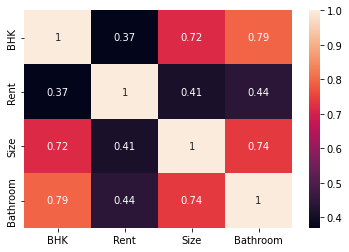

In [ ]:
cor = data.corr()
sns.heatmap(cor,annot=True)

In [ ]:
# BHK and Bathroom columns are highly correlated to each other
# BHK and Size columns are highly correlated to each other
# Size and Bathroom columns are highly correlated to each other

In [ ]:
# Dropping BHK and Size column to eliminate correlation
data.drop(['BHK','Size'],axis=1,inplace=True)

### Changing Categorical column to numerical column

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Area Type'] = le.fit_transform(data[['Area Type']])
data['Furnishing Status'] = le.fit_transform(data[['Furnishing Status']])
data.head()

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Rent,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,0.002515,Ground out of 2,2,Bandel,Kolkata,2,Bachelors/Family,2,Contact Owner
1,0.005373,1 out of 3,2,"Phool Bagan, Kankurgachi",Kolkata,1,Bachelors/Family,1,Contact Owner
2,0.004516,1 out of 3,2,Salt Lake City Sector 2,Kolkata,1,Bachelors/Family,1,Contact Owner
3,0.002515,1 out of 2,2,Dumdum Park,Kolkata,2,Bachelors/Family,1,Contact Owner
4,0.001801,1 out of 2,1,South Dum Dum,Kolkata,2,Bachelors,1,Contact Owner


In [ ]:
data1 = pd.get_dummies(data['Floor'],drop_first=True)
data2 = pd.get_dummies(data['Area Locality'],drop_first=True)
data3 = pd.get_dummies(data['City'],drop_first=True)
data4 = pd.get_dummies(data['Tenant Preferred'],drop_first=True)
data5 = pd.get_dummies(data['Point of Contact'],drop_first=True)

In [ ]:
data.drop(['Floor','Area Locality','City','Tenant Preferred','Point of Contact'],axis=1,inplace=True)

In [ ]:
data = pd.concat([data,data1,data2,data3,data4,data5],axis=1)
data.head()

,Rent,Area Type,Furnishing Status,Bathroom,1 out of 1,1 out of 10,1 out of 11,1 out of 12,1 out of 13,1 out of 14,...,whitefield,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Bachelors/Family,Family,Contact Builder,Contact Owner
0,0.002515,2,2,2,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1,0.005373,2,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,0.004516,2,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,0.002515,2,2,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,0.001801,1,2,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
x = data.drop('Rent',axis=1)
y = data.iloc[:,1]

### Applying Principal Component Analysis to decrese the number of columns

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
x = pca.fit_transform(x)

## Model creation

### Splitting the dataset into train and test dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

### Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.8724247580647888

### Decision Tree Regressor Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = dtr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.9595536246699037

### Random Forest Regressor Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
dtr = RandomForestRegressor()
dtr.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred = dtr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.9773625947235474